## Applied - Question 7

This question will apply the random forest to the Boston dataset.

Boston dataset - a data frame with 506 observations and 14 variables.
The data was originally published by Harrison, D. and Rubinfeld, D.L. 
`Hedonic prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.

There are 14 attributes in each case of the dataset. They are:

  1. CRIM - per capita crime rate by town  
  2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
  3. INDUS - proportion of non-retail business acres per town.
  4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
  5. NOX - nitric oxides concentration (parts per 10 million)
  6. RM - average number of rooms per dwelling
  7. AGE - proportion of owner-occupied units built prior to 1940
  8. DIS - weighted distances to five Boston employment centres
  9. RAD - index of accessibility to radial highways
  10. TAX - full-value property-tax rate per $10,000
  11. PTRATIO - pupil-teacher ratio by town
  12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
  13. LSTAT - % lower status of the population
  14. MEDV - Median value of owner-occupied homes in $1000's

#### Import block

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydotplus
from IPython.display import Image
from six import StringIO

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,\
    export_graphviz
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, \
    RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

Define the print_tree function

In [2]:
# This function return the tree image 
def print_tree(estimator, features, class_names=None, filled=True):    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features,
                    class_names=class_names, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [3]:
# Import data
data_path = 'D:\\PycharmProjects\\ISLR\\data\\'
df = pd.read_csv(f'{data_path}Boston.csv')

# Set X and y
X = df.drop('medv', axis=1)
y = df.medv

# First look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
# Split train, test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=1)

In the lab, we used random forest with max_features = 6, n_estimators = 5/500. 
Using a range of ntree and max_features for random forest to display the 
test error result.


In [5]:
# RMSE for plot
RMSE = []

# Range of values
features_range = {'p': X.shape[1],
                  'p/2': np.int(X.shape[1]/2),
                  '$\sqrt{p}$': np.int(np.sqrt(X.shape[1])),
                  '1': 1}
estimator_range = np.arange(1, 100)

# random forest for each of the range
for m in features_range:
    for n in estimator_range:
        # Regression with RF
        rf = RandomForestRegressor(max_features=features_range[m], n_estimators=n,random_state=1)
        rf.fit(X_train, y_train)
        
        # Prediction
        y_pred = rf.predict(X_test)
        
        # RMSE
        result = [m, n, np.sqrt(mean_squared_error(y_test, y_pred))]
        RMSE.append(result)

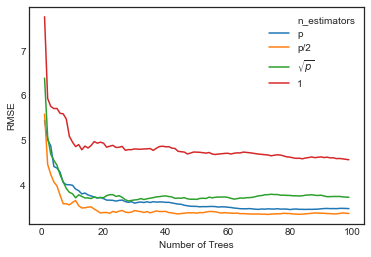

In [6]:
# Plot
sns.lineplot('Number of Trees', 'RMSE', hue='n_estimators', 
             data=pd.DataFrame(RMSE,columns=['n_estimators','Number of Trees', 'RMSE']))
        

At p/2 = 6 number of estimators, we achieve the lowest RMSE. As noted in the book,
increasing the number of trees does not over fit the data. We can see this in 
effect as n -> 100 there is no jump back up for RMSE. 

In fact, if we do the calculation up to n=500, RMSE would still be decreasing or 
stay relatively constant (which is the most probably given there is almost no change
after 40/50 trees)

In [7]:
print('WTF')

WTF
